Engy-5310: Computational Continuum Transport Phenomena Fall 2021 UMass Lowell; Prof. V. F. de Almeida **18Sep21**

# Homework 02 (21Sep21)

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

### Name: `your name`

### Rubric for each assignment: 

|       Context               |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file in the Blackboard submission portal as: 
   </span> 
   
   **lastname-firstname-labwork-xx.ipynb**

---
## Table of Assignments<a id="toa"></a>
* [Assignment 1 (45 pts)](#a1) Function approximation with Wavelets basis functions at collocation points.
 - [1.1)](#a11)(5 pts) Generate the target function.
 - [1.2)](#a12)(20 pts) Compute parameters for a given error level.
 - [1.3)](#a13)(10 pts) Plot the residual function and analyze it.
 - [1.4)](#a14)(10 pts) Demonstrate *numerically* the residual is a minimum.
* [Assignment 2 (40 pts)](#a2) Function approximation with Wavelets basis functions.
 - [2.1)](#a21)(30 pts) Using the same basis functions, approximate the target function continuously ($m\rightarrow\infty$).
 - [2.2)](#a22)(10 pts) Demonstrate *numerically* the residual is a minimum.
* [Assignment 3 (5 pts)](#a3) .
---

## <span style="color:blue">[Assignment 1 (45 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">[1.1)](#toa)(5 pts) Generate the following piecewise linear function on these shape points:</span>
<br>
<span style="color:blue">
  $\{(-8,1),(-6,10),(-5,-7),(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10),(12,15),(14,18),(15,10)\}$.
</span><a id="a11"></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy.linalg import solve
from scipy.integrate import quad
import math

In [26]:
shape_pts=np.array([(-8,1),(-6,10),(-5,-7),(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10),(12,15),(14,18),(15,10)])

x = shape_pts[:,0]
y = shape_pts[:,1]

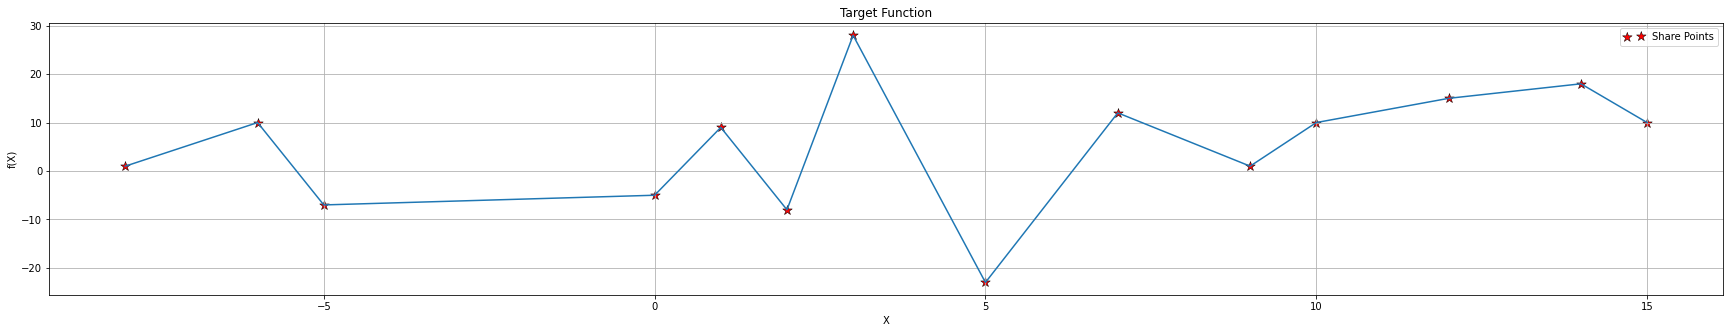

In [27]:
'''Generate the target function f'''

%matplotlib inline
def TargetFunction(x,y,markersize):
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(5)
    plt.plot(x,y)
    p1=plt.scatter(x,y,marker = '*',s=markersize,edgecolors = 'black', linewidth=.5,c = 'red')
    plt.legend([p1],['Share Points'],scatterpoints=2,loc ="upper right")
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.title('Target Function')
    plt.rcParams.update({'font.size': 18})
    plt.grid()
    return plt


f = TargetFunction(x,y,markersize = 100)



### <span style="color:blue">[1.2)](#toa)(20 pts) Compute "the best" approximant function $g$ using Wavelet basis functions with adequate parameters to approximate $f$ with a relative $L_2$ norm below 30% error; use a small number of collocation points as you are able to. Report the number of packets, modes, and other parameters used, show a comparison plot, compute the $L_2$ norm relative error, and explain mathematically in what sense is your approximant the best.
</span><a id="a12"></a>

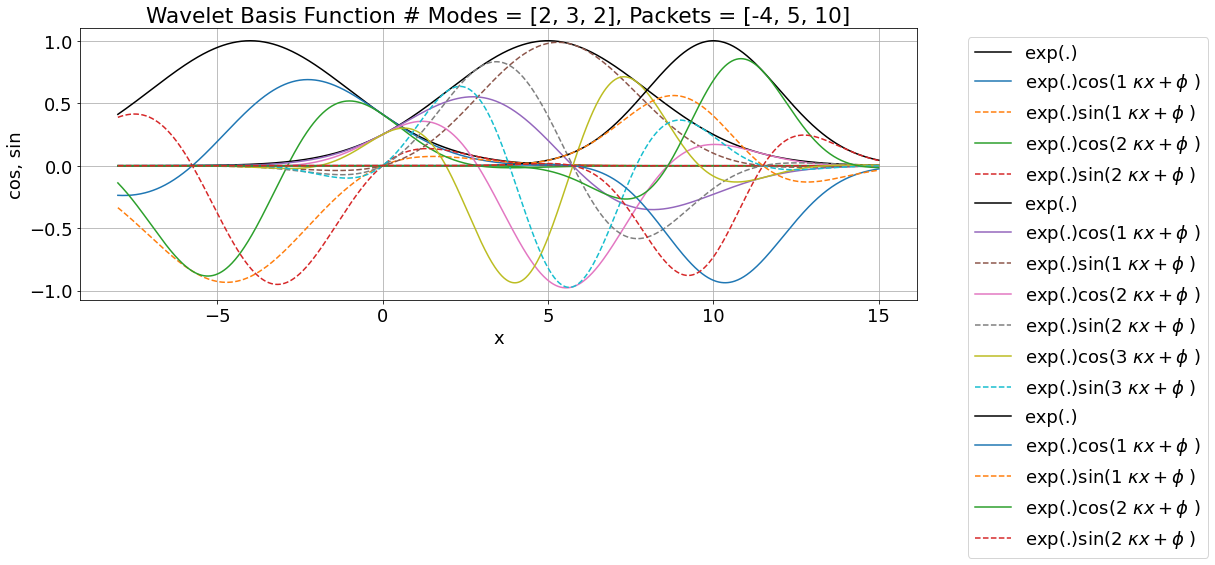

In [36]:
'''Build the basis functions'''
#-------------------------------------------------------------------------------#
#-----------------------------------------------------------------------------------------------------------------------------------------------#




def WaveletBasis(kappa, bunch_pts, N, sigma, phase_shift, x_min, x_max, m):
    x_new = np.linspace(x_min,x_max,m)
    A = np.zeros((len(x_new),int(sum(N)* 2 + len(N))))

    j=0
    for i, modes in enumerate(N):
        sig = sigma[i]
        p = bunch_pts[i]
        first_col = int(sum(N[:i]))*2+i
        A[:,first_col] = np.exp(-((x_new-p)**2)/(2*(sig**2)))
        #print(np.exp(-((x_new-p)**2)/(2*(sig**2))))
        for mode_num in range(modes):
            column = first_col + (mode_num*2) + 1
            j = mode_num + 1
            #points = (())
            A[:,column] = np.exp(-((x_new-p)**2)/(2*(sig**2)))*(np.cos(j*kappa*x_new + (phase_shift*x_new**2)/2))
            A[:,column+1] = np.exp(-((x_new-p)**2)/(2*(sig**2)))*((np.sin(j*kappa*x_new + (phase_shift*x_new**2)/2)))
    return np.array(A)

#for x in range(len(x_new)):

#-------------------------------------------------------------------------------------------------------------------------------------------------#
m = 1000
N = [2, 3, 2]
bunch_pts = [-4, 5, 10]
sigma = [3, 3, 2]
phase_shift = 0

x_min = shape_pts[0][0]
x_max = shape_pts[-1][0]
wavelength = x_max - x_min
x_new = np.linspace(x_min,x_max,m)

Kappa = (2*np.pi)/wavelength

#-------------------------------------------------------------------------------------------#
A = WaveletBasis(Kappa, bunch_pts, N, sigma, phase_shift, x_min, x_max, m)
#print(A[:,0],A[:,6],A[:,13])
#-------------------------------------------------------------------------------------------#


def plotWavelet(N,bunch_pts,phase_shift,sigma,kappa,x_min,x_max,x,y,m):

    #num_plotting_pts = 1000
    x_new = np.linspace(x_min, x_max, m)
    A = WaveletBasis(kappa, bunch_pts, N, sigma, phase_shift, x_min, x_max, m)

    fig = plt.figure(figsize=(15, 5))
    ax = plt.subplot(111)

    plt.grid()
    plt.title(f"Wavelet Basis Function # Modes = {N}, Packets = {bunch_pts}")
    plt.xlabel('x'); plt.ylabel('cos, sin')
    for i, modes in enumerate(N):
        first_col = int(sum(N[:i])) * 2 + i
        plt.plot(x_new, A[:, first_col], "k-", label="exp(.)")
        for modeNum in range(modes):
            # Iterates through an individual packet
            column = first_col + (modeNum) * 2 + 1

            k = modeNum + 1

            plt.plot(x_new, A[:, column],'-' ,label=r"exp(.)cos(%i $\kappa x + \phi$ )" % k)
            plt.plot(x_new, A[:, column + 1],'--' ,label=r"exp(.)sin(%i $\kappa x + \phi$ )" % k)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return plt.show()
    
    
plotWavelet(N, bunch_pts, phase_shift, sigma, Kappa, x_min, x_max, x, y, m)



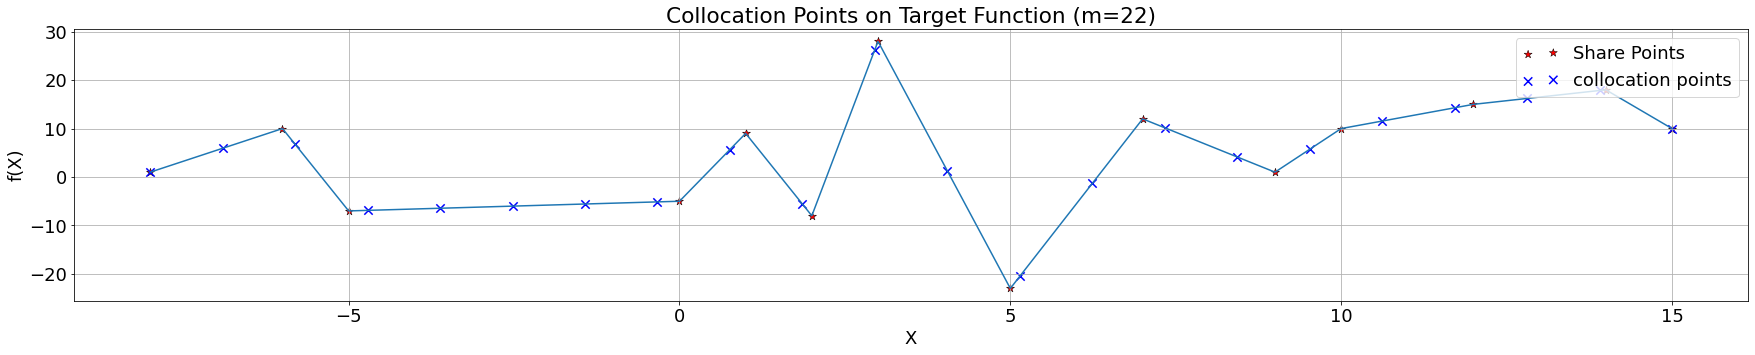

In [37]:
'''Collocation abscissa points'''
x_min = shape_pts[0][0]
x_max = shape_pts[-1][0]
m = 22
assert m >= len(shape_pts)

u = interpolate.interp1d(x, y, kind='linear',fill_value='array-like')
x_coll = np.linspace(x_min, x_max, m)

y_new = u(x_coll)


markersize = 70


f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x,y)
p1=plt.scatter(x,y,marker = '*',s=markersize,edgecolors = 'black', linewidth=.5,c = 'red')
p2 = plt.scatter(x_coll,y_new, marker='x',s=markersize,c='blue')
plt.legend([p1,p2],['Share Points','collocation points'],scatterpoints=2,loc ="upper right")
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('Collocation Points on Target Function (m='+str(m)+')')
plt.rcParams.update({'font.size': 18})
plt.grid()

In [38]:
'''Build the basis functions collocation matrix'''

#-------------------------------------------------------------------------------------------------------------------#
def evaluation(N, bunch_pts, shift, sigmas, Kappa, x_min, x_max, num_pts):
    
    #x_colloc_pts = np.linspace(x_min, x_max, num_pts)
    a_tilde_mtrx = WaveletBasis(Kappa, bunch_pts, N, sigma, shift, x_min, x_max, num_pts)
    
    return np.array(a_tilde_mtrx)






#x_colloc_pts = np.linspace(x_min, x_max, num_pts)
#-------------------------------------------------------------------------------------------------------------------#

a_tilde_mtrx = evaluation(N, bunch_pts, phase_shift, sigma, Kappa, x_min, x_max, num_pts=100000)

if a_tilde_mtrx.shape[0] > a_tilde_mtrx.shape[1]:
    print('A is overdetermined.')
elif a_tilde_mtrx.shape[0] < a_tilde_mtrx.shape[1]:
    print('A is underdetermined.')  
else:
    print('A is determined.')



if np.linalg.matrix_rank(a_tilde_mtrx) == min(a_tilde_mtrx.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')


A is overdetermined.
A is full rank.


In [7]:
'''Build target function vector at the collocation points'''




'Build target function vector at the collocation points'

In [8]:
'''Compute optimal coefficient vector'''


'Compute optimal coefficient vector'

In [9]:
'''Build the best approximant function'''


'Build the best approximant function'

In [10]:
'''Plot comparison of f and g_best_vec'''


'Plot comparison of f and g_best_vec'

In [11]:
'''L2 norm error'''


'L2 norm error'

<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[1.3)](#toa)(10 pts) Plot the residual function and analyze it.
</span><a id="a13"></a>

In [12]:
'''Residual of the best approximant'''


'Residual of the best approximant'

<span style="color:blue">**Analysis:**</span>

### <span style="color:blue">[1.4)](#toa)(10 pts) Demonstrate *numerically* that the residual is a minimum. Explain.
</span><a id="a14"></a>

In [13]:
'''Code for minimum'''


'Code for minimum'

<span style="color:blue">**Explanation:**</span>

## <span style="color:blue">[Assignment 2 (40 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">[2.1)](#toa)(30 pts) Compute "the best" approximant function $g$ using wavelets basis functions with the same parameters as before; use a continuous approximation and compare to the results obtained earlier in 1.2). Does the error decrease? Why or why not?
</span><a id="a21"></a>

In [14]:
'''Build the Gram matrix'''


'Build the Gram matrix'

In [15]:
'''Build load vector'''


'Build load vector'

In [16]:
'''Compute optimal coefficient vector'''


'Compute optimal coefficient vector'

In [17]:
'''Build the best approximant function'''


'Build the best approximant function'

In [18]:
'''Plot comparison of f and g_best_vec'''


'Plot comparison of f and g_best_vec'

In [19]:
'''L2 norm error'''


'L2 norm error'

In [20]:
'''Residual of the best approximant'''


'Residual of the best approximant'

In [21]:
'''Code for comparison to collocation method'''


'Code for comparison to collocation method'

<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[2.2)](#toa)(10 pts) Demonstrate *numerically* that the residual is a minimum. Explain.
</span><a id="a22"></a>

In [22]:
'''Code for minimum'''


'Code for minimum'

<span style="color:blue">**Explanation:**</span>

## <span style="color:blue">[Assignment 2 (5 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>

<span style="color:blue">**Answer:**</span>